/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Intersecting_cell
Buried_pins
Intersecting_pins
Buried_nets
Intersecting_nets
Cell_Utilization
Std_cell_area
Std_cell_count
Pin_density
Cell_density
x
y
     DRC
0      0
1      0
2      0
3      0
4      0
..   ...
195    1
196    1
197    1
198    1
199    1

[200 rows x 1 columns]
1.0
xcorall + ycorall
[482.22, 331.74, 297.54, 249.66, 379.62, 3.42, 413.82, 277.02, 612.18, 92.34, 10.26, 468.54, 78.66, 3.42, 475.38, 229.14, 208.62, 495.9, 584.82, 468.54, 331.74, 119.7, 359.1, 536.94, 283.86, 495.9, 530.1, 181.26, 571.14, 461.7, 188.1, 64.98, 58.14, 64.98, 3.42, 147.06, 475.38, 17.1, 58.14, 201.78]
[509.58, 509.58, 509.58, 509.58, 509.58, 85.5, 509.58, 509.58, 502.74, 509.58, 78.66, 509.58, 106.02, 64.98, 509.58, 140.22, 133.38, 99.18, 71.82, 502.74, 502.74, 509.58, 502.74, 502.74, 509.58, 509.58, 509.58, 509.58, 509.58, 509.58, 509.58, 509.58, 44.46, 71.82, 92.34, 509.58, 502.74, 99.18, 99.18, 509.58]
xcor_drc+ycor_drc
[3.42, 10.26, 78.66, 3.42, 229.14, 208.62, 495.9, 584.82, 58.14, 6

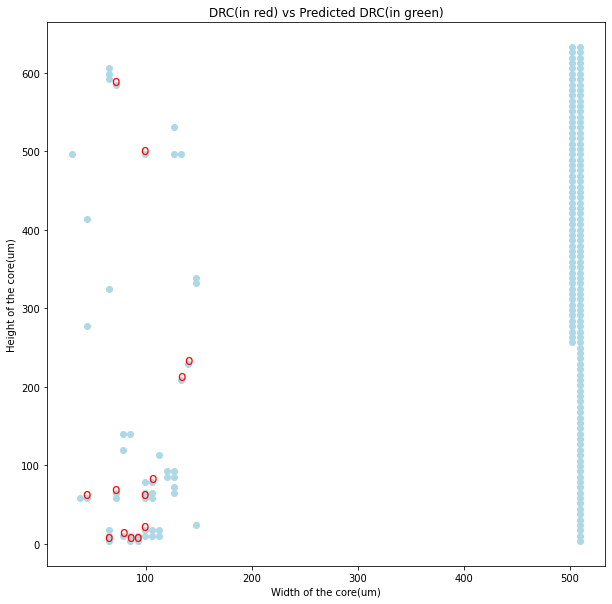

In [16]:
#my one
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
t_df1 = pd.read_csv("/content/sample_data_with_coordinates.csv")





#print(t_df1)

#t_df = shuffle(t_df1)
t_df = t_df1.iloc[0:, :]
rnd_clf = RandomForestClassifier(
n_estimators=200,
criterion='gini',
max_depth=7,
min_samples_split=20,
class_weight="balanced",
random_state=100
)
#rnd_clf = GaussianNB()

t_df.drop(labels = ["Buried_cell"], axis = 1, inplace = True)
t_df.drop(labels = ["Total_region_area"], axis = 1, inplace = True)


t_df.drop(labels = ["Index"], axis = 1, inplace = True)

# print(train_test.iloc[:, 0:10].columns.values)
x_c = t_df["x"]
y_c = t_df["y"]
# train_test_y = train_test["DRC"]
# train_test[train_test["DRC"] != 0] = 1
train_df = t_df.iloc[0:, 0:12]

for col in train_df.columns:
  print(col)

train_y = t_df.iloc[0:,12:]

train_y[train_y["DRC"] != 0] = 1

print(train_y)
train_cv, train_test, train_cv_y, train_test_y = train_test_split(train_df, train_y,test_size = 0.20 ,random_state=100)
rnd_clf.fit(train_cv,train_cv_y)
predictions = rnd_clf.predict(train_test)
xcor_all = list(train_test['x']) 
ycor_all = list(train_test['y'])
drcList = list(train_test_y['DRC'])
#print(train_test)

xcor_drc = []
ycor_drc =[]

xcor_pred =[]
ycor_pred = []

for i in range(0, len(drcList)):
  if drcList[i] == 1:
    xcor_drc.append(xcor_all[i])
    ycor_drc.append(ycor_all[i])

for i in range(0, len(predictions)):
  if predictions[i] == 1:
    xcor_pred.append(xcor_all[i])
    ycor_pred.append(ycor_all[i])

print(accuracy_score(train_test_y['DRC'],predictions))
print("xcorall + ycorall")
print(xcor_all)
print(ycor_all)

print("xcor_drc+ycor_drc")
print(xcor_drc)

print(ycor_drc)

print(drcList)

print("xcor_pred+ycor_pred")
print(xcor_pred)
print(ycor_pred)

print(predictions)

orginal_label = list(train_test_y['DRC'])



x_c = t_df["x"]
y_c = t_df["y"]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(t_df1['y'],t_df1['x'],marker="o", color="lightblue")
ax.set_title('DRC(in red) vs Predicted DRC(in green)')

for i in range(0, len(xcor_drc)):
  ax.annotate('o', (ycor_drc[i]-4,xcor_drc[i]),fontsize=10,color='Red')

# for i in range(0, len(xcor_pred)):
#     ax.annotate('o', (ycor_pred[i]-4,xcor_pred[i]),fontsize=10,color='Green')
  # else:
  #   ax.annotate('o', (ycor[i]-4,xcor[i]),fontsize=10,color='Green')

plt.xlabel('Width of the core(um)')
plt.ylabel('Height of the core(um)')
plt.savefig("DRC_prediction.png", dpi=150)

In [ ]:
# Sir code
t_df1 = pd.read_csv("")
print(t_df1)
np.random.seed(6)
t_df = shuffle(t_df1)
t_df = t_df.iloc[0:, :]

t_df.drop(labels = ["Buried_cell"], axis = 1, inplace = True)
t_df.drop(labels = ["total_area"], axis = 1, inplace = True)

train_test = t_df.copy()

# print(train_test.iloc[:, 0:10].columns.values)
x_c = t_df["x"]
y_c = t_df["y"]
train_test_y = train_test["drc"]
train_test[train_test["drc"] != 0] = 1
# print(train_test)
train_test.drop(labels = ["drc"], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(t_df1['y'],t_df1['x'],marker="o", color="lightblue")
ax.set_title('DRC(in red) vs Predicted DRC(in Green)')
for i, txt in enumerate(t_df['x'].index):
x = x_c.loc[txt]
y = y_c.loc[txt]
# print(x,y)
if train_test_y.loc[txt] == 1 :
# print(x,y)
ax.annotate('o', (y-4,x),fontsize=10,color='Red')
# print(train_test['x'].loc[i], train_test['y'].loc[i])
if predictions[i] == True :
ax.annotate('X', (y-4,x),fontsize=10,color='Green')

plt.xlabel('Width of the core(um)')
plt.ylabel('Height of the core(um)')
plt.savefig("DRC_prediction.png", dpi=150)